# Word Cloud das Resenhas dos Livros

In [1]:
from bs4 import BeautifulSoup as soup
import requests
from urllib.request import urlopen as uReq
import csv

## 1. Extração das resenhas do Skoob

In [2]:
# Livro escolhido: Dragão Vermelho 
book = '2622'
resenhas_skoob = 'http://www.skoob.com.br/livro/resenhas/'
url = resenhas_skoob + book

In [3]:
uClient = uReq(url)
page_html = uClient.read()

In [4]:
uClient.close()
page_soup = soup(page_html, "html.parser")

In [5]:
#page_soup

In [6]:
results = page_soup.find_all("div", {"class": "curva2-5", "style": "background-color:#EEE; padding: 10px;"})

In [7]:
page_soup.find_all("div", {"style": "border:0px red solid;"})[4].find_all('strong')[1].text

'Diferente'

In [8]:
contador = page_soup.find("div", {"class": "contador"}).text

In [9]:
results_page = int(contador.split('a')[-1])
total_pages = int(contador.split('encontrados')[0])/results_page

In [10]:
d_m_y = page_soup.find("span", {"style": "color:#666666; font-size:11px; display:block; float:left;"}).text

In [11]:
page_soup.findChildren("span", {"style": "color:#666666; font-size:11px; display:block; float:left;"})

[<span style="color:#666666; font-size:11px; display:block; float:left;"> 28/06/2019</span>,
 <span style="color:#666666; font-size:11px; display:block; float:left;"> 01/06/2019</span>,
 <span style="color:#666666; font-size:11px; display:block; float:left;"> 14/09/2018</span>,
 <span style="color:#666666; font-size:11px; display:block; float:left;"> 10/08/2018</span>,
 <span style="color:#666666; font-size:11px; display:block; float:left;"> 06/08/2018</span>,
 <span style="color:#666666; font-size:11px; display:block; float:left;"> 05/02/2018</span>,
 <span style="color:#666666; font-size:11px; display:block; float:left;"> 03/02/2018</span>,
 <span style="color:#666666; font-size:11px; display:block; float:left;"> 23/12/2017</span>,
 <span style="color:#666666; font-size:11px; display:block; float:left;"> 08/07/2017</span>,
 <span style="color:#666666; font-size:11px; display:block; float:left;"> 16/06/2017</span>,
 <span style="color:#666666; font-size:11px; display:block; float:left

In [12]:
reviews=[]
dates=[]
titles=[]
for page in range(1, int(total_pages) + 2):
    new_url = url+'/mpage:'+str(page)
    uClient = uReq(new_url)
    page_html = uClient.read()
    uClient.close()
    page_soup = soup(page_html, "html.parser")
    
    results = page_soup.find_all("div", {"class": "curva2-5", "style": "background-color:#EEE; padding: 10px;"})
    reviews = reviews + [review.div.text for review in results]
    titles = titles + [review.div.find_all('strong')[-1].text for review in results]
    
    #results = page_soup.find_all("div", {"style": "border:0px red solid;"})
    #page_soup.find_all("strong", {"style": "font-size:12px; color:red; margin-right:10px;"})[0].parent.find_all('strong')[-1].text
    #for title in results:
#         try: 
#             aux = title.find_all('strong')[1].text
#         except:
#             aux = ''
#         titles = titles + [aux]
    dates = dates + [date.text for date in page_soup.findChildren("span", {"style": "color:#666666; font-size:11px; display:block; float:left;"})]

In [13]:
#page_soup.find_all("div", {"class": "curva2-5", "style": "background-color:#EEE; padding: 10px;"})[4].div.find_all('strong')[-1].text
#page_soup.find_all("div", {"class": "curva2-5", "style": "background-color:#EEE; padding: 10px;"})[5].div.text
#page_soup.find_all("div", {"class": "curva2-5", "style": "background-color:#EEE; padding: 10px;"})[3]

In [14]:
titles

['Bem morno',
 'Kakau',
 'Fantástico',
 'Ótima leitura, mas falta empolgação!',
 'Diferente',
 'Rodrigo Cassimiro',
 'Dragão Vermelho',
 'Excelente!',
 ' http://umolhardeestrangeiro.blogspot.com.br/2017/06/dragao-vermelho-resenha.html',
 'Sensacional.',
 'Raphael',
 'Um pouco decepcionante...',
 'Decepcionante',
 ' http://amadoslivros.blogspot.com.br/2015/10/livrofilme-dragao-vermelho.html',
 ' http://clubedofarol.blogspot.com.br/2016/09/resenha-dragao-vermelho.html',
 ' http://surteipostei.blogspot.com.br/2016/07/dragao-vermelho.html',
 'Muito bom',
 'Não é grandes coisas... ',
 ' https://quasevingativa.wordpress.com/2016/03/16/hannibal-begins-dragao-vermelho/',
 'Um pouco decepcionada',
 'João',
 'Foi uma releitura',
 'Tauan',
 'Direto do livro do Apocalipse...',
 ' www.entrelinhasfantasticas.com.br',
 'Cansativo',
 'Karina',
 'Dragão Vermelho',
 'Patty Pizarro',
 'Ótima leitura! Recomendo! ',
 ' http://recolhendopalavras.blogspot.com.br/2015/01/resenha-dragao-vermelho.html',
 'Fasci

In [15]:
reviews[0]

'etsilvio 28/06/2019Bem mornoA história é até interessante, já a escrita, nem tanto. Não consegui me envolver com os personagens, e a dupla de investigadores, nem se fala... Vou deixar pra ler Hannibal num futuro.'

In [16]:
dates[0]

' 28/06/2019'

In [17]:
print(len(dates))
print(len(reviews))
print(len(titles))

56
56
56


In [18]:
i=0
reviews[i].split(dates[i])[1].split(titles[i])[1]

'A história é até interessante, já a escrita, nem tanto. Não consegui me envolver com os personagens, e a dupla de investigadores, nem se fala... Vou deixar pra ler Hannibal num futuro.'

In [19]:
copy_reviews = reviews[:]

In [20]:
#reviews=copy_reviews[:]

In [21]:
for i in range(len(reviews)): 
    aux=reviews[i].split(dates[i])[1].split(titles[i])
    j=len(aux)-1
    reviews[i]=aux[j]

In [22]:
reviews[1]

'Personagens:\r\nDr. Hannibal Lecter'

In [23]:
#write csv file with reviews
# with open('skoob_reviews_dragao_vermelho.csv', 'w', encoding="utf-8") as myfile:
#     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
#     wr.writerow(reviews)

In [2]:
import csv
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('floresta')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, WordPunctTokenizer
import string

import spacy
#from spacy.lang.pt.examples import sentences 
#!python3 -m spacy download pt_core_news_sm

from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
with open('skoob_reviews_dragao_vermelho.csv', 'r', encoding="utf-8") as f:
    reader = csv.reader(f)
    reviews = list(reader)[0]

In [4]:
#https://spacy.io/models/pt#pt_core_news_sm
nlp = spacy.load('pt_core_news_sm')
doc = nlp(reviews[0])
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_)

A história é até interessante, já a escrita, nem tanto. Não consegui me envolver com os personagens, e a dupla de investigadores, nem se fala... Vou deixar pra ler Hannibal num futuro.
A DET det
história NOUN nsubj
é VERB cop
até ADP advmod
interessante ADJ ROOT
, PUNCT punct
já ADV advmod
a DET det
escrita NOUN obl
, PUNCT punct
nem ADP case
tanto NOUN conj
. PUNCT punct
Não ADV advmod
consegui VERB ROOT
me PRON obj
envolver VERB xcomp
com ADP case
os DET det
personagens SYM obl
, PUNCT punct
e CCONJ cc
a DET det
dupla NOUN conj
de ADP case
investigadores NOUN nmod
, PUNCT punct
nem CCONJ cc
se PRON expl
fala VERB conj
... PUNCT punct
Vou AUX aux
deixar VERB aux
pra ADP obl
ler VERB ROOT
Hannibal PROPN obj
num PROPN amod
futuro ADJ amod
. PUNCT punct


In [5]:
len(reviews)

56

In [6]:
'...!!!!...***'.strip(string.punctuation)

''

In [7]:
# Aqui, vamos retirar as chamadas stopwords (conjunções, preposições, palavras que não nos interessam)
# Vamos ver quais stopwords já existem na biblioteca
stop_words = stopwords.words('portuguese') + list (string.punctuation)
print(stop_words)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [8]:
# Podemos adicionar novas stopwords
stop_words.extend(('livro','é', 'história','ler', 'leitura', 'literatura', '\n', '\n\n', '...'))

In [9]:
# Quebra em palavras (em letras minusculas) e remoção dessas stopwords
word_tokens=[]
for review in reviews: 
    word_tokens = word_tokens + list(nlp(review))

filtered_word_reviews = [w.text.lower() for w in word_tokens if not w.text in stop_words]

In [10]:
print(word_tokens[:100]) 
print()
print(filtered_word_reviews[:100]) 

[A, história, é, até, interessante, ,, já, a, escrita, ,, nem, tanto, ., Não, consegui, me, envolver, com, os, personagens, ,, e, a, dupla, de, investigadores, ,, nem, se, fala, ..., Vou, deixar, pra, ler, Hannibal, num, futuro, ., Personagens, :, 
, Dr., Hannibal, Lecter, Por, desconhecimento, inverti, a, ordem, e, li, primeiro, ", o, silêncio, dos, inocentes, ", ,, assim, o, segundo, a, ser, lido, foi, dragão, vermelho, ,, mas, não, houve, maiores, problemas, n, isso, ., 

, O, fato, é, que, não, achei, que, leria, outra, obra, de, Thomas, Harris,  , tão, boa, quanto, ", silêncio, dos, inocentes]

['a', 'interessante', 'escrita', 'tanto', 'não', 'consegui', 'envolver', 'personagens', 'dupla', 'investigadores', 'fala', 'vou', 'deixar', 'pra', 'hannibal', 'futuro', 'personagens', 'dr.', 'hannibal', 'lecter', 'por', 'desconhecimento', 'inverti', 'ordem', 'li', 'primeiro', 'silêncio', 'inocentes', 'assim', 'segundo', 'ser', 'lido', 'dragão', 'vermelho', 'maiores', 'problemas', 'n', 'o', 

In [11]:
len(word_tokens)

10370

In [12]:
len(filtered_word_reviews)

5010

In [13]:
def drawWordCloud(words, filename):
    text = ''
    for w in words:
        text = text + ' ' + w

    mask = np.array(Image.open("red_dragon_symbol.jpg"))
    image_colors = ImageColorGenerator(mask)

    wordcloud = WordCloud(min_font_size=4,
                          max_font_size=300,
                          background_color="white", 
                          #contour_width=1, contour_color='red',
                          max_words=1000, mask=mask).generate(text)
    
    #wordcloud.to_file("hanibbal_1.png")
    
    fig, axes = plt.subplots(1,2 , figsize=(16,18))
    axes[0].imshow(mask, cmap=plt.cm.gray, interpolation="bilinear")
    axes[1].imshow(wordcloud.recolor(color_func=image_colors,random_state=3),
           interpolation="bilinear")
    for ax in axes:
        ax.set_axis_off()
    plt.savefig(filename + ".png", format="png", dpi=300)
    plt.show()

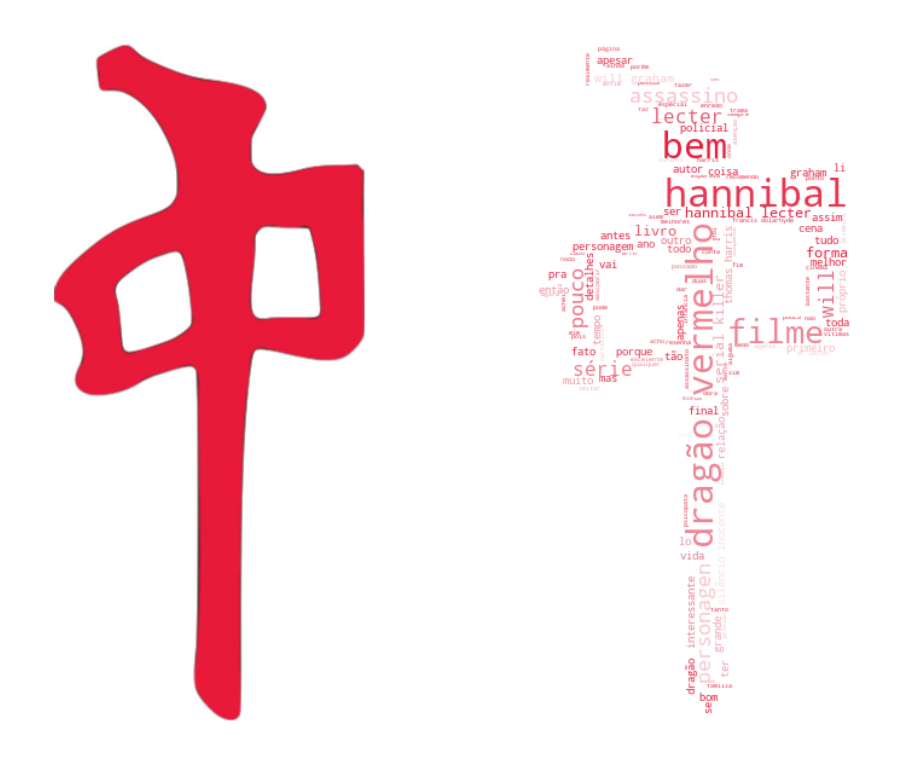

In [14]:
drawWordCloud(filtered_word_reviews, "dragao_veremelho_geral")

In [15]:
filtered_word_reviews_pos = [(w.text.lower(),w.pos_) for w in word_tokens if not w.text in stop_words]

In [16]:
filtered_word_reviews_pos[0:10]

[('a', 'DET'),
 ('interessante', 'ADJ'),
 ('escrita', 'NOUN'),
 ('tanto', 'NOUN'),
 ('não', 'ADV'),
 ('consegui', 'VERB'),
 ('envolver', 'VERB'),
 ('personagens', 'SYM'),
 ('dupla', 'NOUN'),
 ('investigadores', 'NOUN')]

In [17]:
adjs = [word for (word, pos) in filtered_word_reviews_pos if(pos == 'ADJ')]
adjs[0:10]

['interessante',
 'futuro',
 'primeiro',
 'segundo',
 'maiores',
 'inocentes',
 'incríveis',
 'superior',
 'surpreendente',
 'melhores']

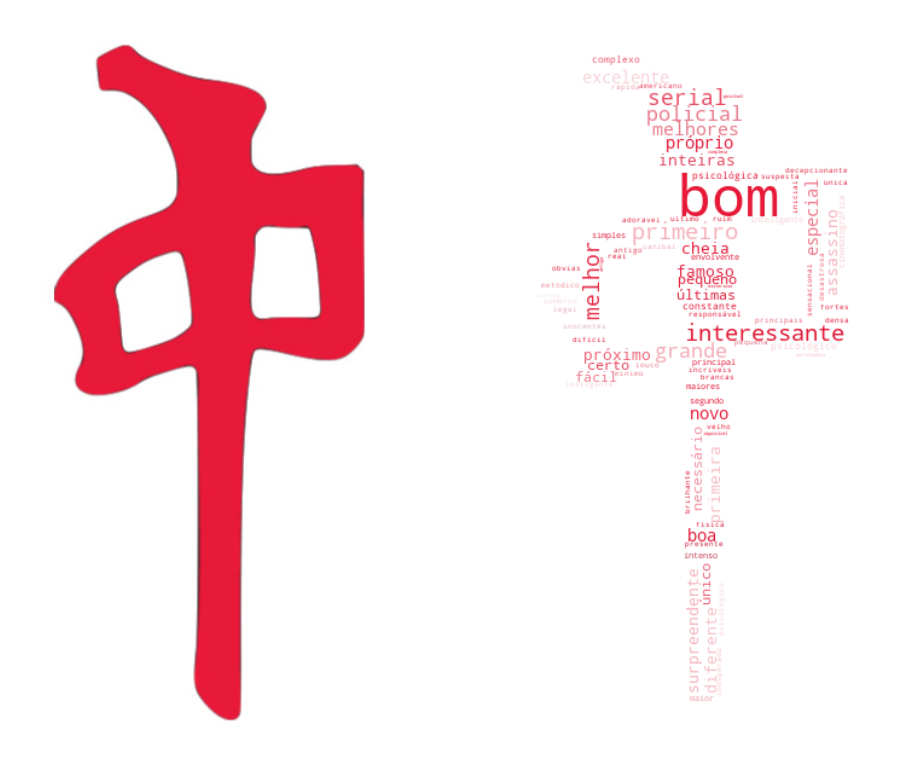

In [18]:
drawWordCloud(adjs, "dragao_vermelho_adjs")